In [1]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import numpy as np
from qiskit import transpile
from qiskit.quantum_info import Kraus, SuperOp, Operator
from qiskit.extensions import RYGate
from qiskit.providers.aer import AerSimulator
# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import scipy.optimize as opt
import statistics
import math
%matplotlib inline
import matplotlib.pyplot as plt

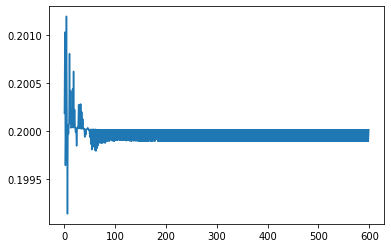

0.19996430843049007
1.2966703327723358e-08
1.4218980289593161e-08
6.079022331103671e-11


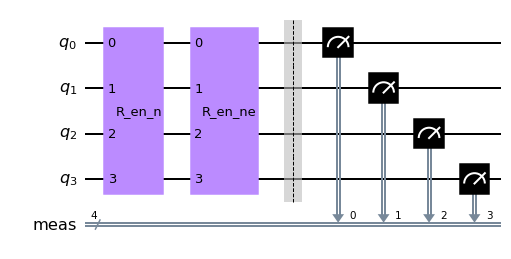

In [54]:
a=0.2
p=0.9
pi=np.pi
theta=np.arcsin(np.sqrt(a))
opt_results_e=[]
n0=[]
n1=[]
n2=[]
theta_0=[pi/4]
Ng=[]
m=[]
qlist=[]
it=2
N=2**20
n=4
amf=300
for q in range(n):
    qlist.append(q)
d=2**n
N0='0'*n
N1='1'*n
for k in range(amf):
    Ng.append(2*k+1)
    m.append(k+1)
    n0.append([])
    n1.append([])
    n2.append([])
    R_1=[np.cos(Ng[k]*theta),-np.sin(Ng[k]*theta)]
    R_2=[np.sin(Ng[k]*theta),np.cos(Ng[k]*theta)]
    R_1[1:1]=[0]*(d-2)
    R_2[1:1]=[0]*(d-2)
    R_n=[R_1,R_2]
    for e in range(d-2):
        Z=[0]*(d-1)
        Z.insert(e+1,1)
        R_n.insert(-1,Z)
    R_en_n=Operator(R_n)
    for i in range(it):
        theta_e=Ng[k]*theta_0[i+k*it]+pi/4
        R_1e=[np.cos(-theta_e),-np.sin(-theta_e)]
        R_2e=[np.sin(-theta_e),np.cos(-theta_e)]
        R_1e[1:1]=[0]*(d-2)
        R_2e[1:1]=[0]*(d-2)
        R_ne=[R_1e,R_2e]
        for f in range(d-2):
            Ze=[0]*(d-1)
            Ze.insert(f+1,1)
            R_ne.insert(-1,Ze)
        R_en_ne=Operator(R_ne)
        circ_e_n=QuantumCircuit(n)
        circ_e_n.unitary(R_en_n,qlist,label='R_en_n')
        circ_e_n.unitary(R_en_ne,qlist,label='R_en_ne')
        circ_e_n.measure_all()
        # Create an empty noise model
        noise_depolarizing = NoiseModel()
        noise_depolarizing.add_basis_gates(['unitary'])
        # Add depolarizing error to all single qubit u1, u2, u3 gates
        error = depolarizing_error(1-p**m[k], n)
        noise_depolarizing.add_all_qubit_quantum_error(error, 'R_en_n')
        # Create noisy simulator backend
        sim_noise = AerSimulator(noise_model=noise_depolarizing)
        # Transpile circuit for noisy basis gates
        circ_e_n_tnoise = transpile(circ_e_n, sim_noise)
        # Run and get counts
        if i==0:
            s=np.sqrt(N)
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
        else:
            s=N-np.sqrt(N)
            result_noise = sim_noise.run(circ_e_n_tnoise,shots=s).result()
        counts_noise = result_noise.get_counts(0)
        n0[k].append(counts_noise[N0])
        n1[k].append(counts_noise[N1])
        n2[k].append(s-n0[k][i]-n1[k][i])
        def func(x):
            ans=0
            for l in range(k+1):
                for j in range(i+1):
                    angle=x[0]-theta_0[j+l*it]
                    ans+=np.log((p**m[l])*(1+np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n0[l][j]
                    ans+=np.log((p**m[l])*(1-np.sin(2*Ng[l]*angle))/2+(1-p**m[l])/d)*n1[l][j]
                    ans+=np.log((d-2)*(1-p**m[l])/d)*n2[l][j]
            return -ans
        x=opt.brute(func,[(0,pi/2)])
        opt_results_e.append(np.sin(x[0])**2)
        theta_0.append(x[0])
plt.plot(opt_results_e)
plt.show()
print(statistics.mean(opt_results_e))
print(statistics.variance(opt_results_e))
print(sum((n-a)**2 for n in opt_results_e)/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/(N*sum(SLD)))
circ_e_n.draw('mpl')

In [55]:
print(opt_results_e)
print(opt_results_e[1:600:2])
eee=np.array(opt_results_e)
result=[]
for x in range(600):
    eeee=(eee[1:2*(x+1):2]-a)**2
    eeeee=sum(eeee)
    eeeeee=eeeee/(x+1)
    result.append(eeeeee)
result


[0.2001825762383237, 0.2010264117378759, 0.19964012176916615, 0.200080823980419, 0.20119145429763272, 0.20011231665435658, 0.19913690880878826, 0.2000626559754235, 0.19996940328869317, 0.2000735567041915, 0.20080319954813214, 0.20007537351396984, 0.20041522563415515, 0.2000305606784052, 0.20004691087146936, 0.2000366162470381, 0.20043461765438747, 0.2000329828976096, 0.20061887689998253, 0.2000363134669739, 0.2002213441042997, 0.2000335884541292, 0.19998877912843271, 0.20002934957292748, 0.19984347749352493, 0.2000220829978033, 0.20004206631757962, 0.2000254134991143, 0.20026980789365717, 0.20002450517851267, 0.20027465451437795, 0.20002677598291677, 0.20027950117905685, 0.20001996359870508, 0.20019711385829744, 0.20002268854194954, 0.20012442971606245, 0.20002147745434454, 0.20002753291986627, 0.2000220829978033, 0.19993549726328552, 0.20001784420802782, 0.19995971563283754, 0.20001511928953086, 0.20001784420802782, 0.2000160275941497, 0.20003237734177737, 0.20001511928953086, 0.20000

[1.0535210556493767e-06,
 5.300267857300719e-07,
 3.5755620076866563e-07,
 2.691485933905664e-07,
 2.1640099245875583e-07,
 1.8128102148365652e-07,
 1.5551715485236055e-07,
 1.362451041892099e-07,
 1.2122763389426705e-07,
 1.0923673729320669e-07,
 9.940868701662318e-08,
 9.119641288448998e-08,
 8.421881641583538e-08,
 7.824931852450653e-08,
 7.307273087446858e-08,
 6.855049477363669e-08,
 6.4541556567732e-08,
 6.098451286595777e-08,
 5.779907961222952e-08,
 5.493350857121706e-08,
 5.2332789865927657e-08,
 4.996441727729084e-08,
 4.780322016846196e-08,
 4.5820944032939284e-08,
 4.3995510604517616e-08,
 4.2312344560880607e-08,
 4.0753857483438926e-08,
 3.930702443348505e-08,
 3.7960467859027864e-08,
 3.670368172286782e-08,
 3.552797856323424e-08,
 3.4423513868208094e-08,
 3.338526246780016e-08,
 3.240831350906055e-08,
 3.148741773527122e-08,
 3.0617139362045536e-08,
 2.979321478965524e-08,
 2.901274678719232e-08,
 2.8272393716832035e-08,
 2.756905829998976e-08,
 2.6899692650291927e-08,
 

In [ ]:
aaaaaaa=[sum((opt_results_e[1:2*(x+1):2]-a)**2)/(x+1) for x in range(50)]
print(aaaaaa)
ave_sq_error=[sum((opt_results_e[2*n+1]-a)**2 for n in range(int(len(opt_results_e)/2)))*2/len(opt_results_e)]

In [9]:
print(sum(opt_results_e[2*n+1] for n in range(int(len(opt_results_e)/2)))*2/len(opt_results_e))
print(sum((opt_results_e[2*n+1]-a)**2 for n in range(int(len(opt_results_e)/2)))*2/len(opt_results_e))
SLD=[(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
print(1/((N-np.sqrt(N))*sum(SLD)))
circ_e_n.draw('mpl')

NameError: name 'opt_results_e' is not defined

In [16]:
f=list(range(10))
f_1=[sum(f[0:n+1]) for n in range(1)]
print(f)
print(f_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 45]


In [36]:
a=0.2
p=0.9
d=2**4
amf=100
N=40000
m=list(range(amf))
Ng=[2*c+1 for c in range(amf)]
SLD=[N*(Ng[n]**2*d*p**(2*m[n]))/((2+(d-2)*p**m[n])*(a*(1-a))) for n in range(amf)]
SLD_1=[1/(sum(SLD[0:j+1])) for j in range(amf)]
print(m)
print(Ng)
print(SLD)
print(SLD_1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199]
[249999.99999999994, 1997260.2739726028, 4918290.854572713, 8533707.684745206, 12469055.7369428, 16437388.355193313, 20224454.195564196, 23676106.763607386, 266876